# Numpy
## Objectives
    - Understand how numpy arrays are different from python lists.
        -Numpy arrays can hold one and only one type of data, litsts can hold multiple types of data.
        -Numpy arrays have a size, and the size cannot be changed, lists can add items using "append" function or delete itmes using "pop" function.

- Create arrays in numpy of a given shape.
    -x=np.zeros((2,3)) 
- Use broadcasting to combine arrays.
    - a >0
    - a *b 
    - if two arrays can be broadcast into the same shape, first line up the shapes of the arrays on the right side.

- Index into numpy arrays:
    - Basic indexing, with values and slices, and
        -First three rows: x[:3, :]
        -First and third column: x[:, [0,2]]
    - Advanced indexing with integer arrays
        -You can index an array with another array (or a list), and this is often referred to as advanced indexing or fancy indexing.
        
    - Boolean indexing.
        -Subset to the even entries: x[x % 2 == 0]
        
- Use some numpy methods to process arrays:
    - Mathematical functions.
        np.sqrt(x) or sin, cos, exp...
    - Aggregations.
        -np.sum(x): sum all items 
    - Aggregation across axes.
        -np.sum(x, axis=0) sum by columns 
        -np.sum(x, axis=0) sum by rows 

In [2]:
import numpy as np
import pandas as pd
from scipy import stats

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Numpy: Efficient Array Compuation in Python

**Numpy** is the library behind almost all of the numerical and scientific computing in python.  It's quite true that if it were not for numpy, Python would not be a player in the data science world.

**Note**: It's pronounced **num-pie** as in **pie-thon**, not **num-pee**.

Numpy's major feature is its `array` data type (technically, it's called an `ndarray`, but everyone just calls them arrays).

Numpy arrays, on the face of it, look a lot like python lists:

In [9]:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

AttributeError: 'numpy.ndarray' object has no attribute 'pop'

And you can do pretty much anything to a numpy array that you could do to a list:

In [13]:
y =[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
y.pop(2)
y

[0, 1, 3, 4, 5, 6, 7, 8, 9]

In [4]:
x[:5]

array([0, 1, 2, 3, 4])

In [5]:
x[1:8:2]

array([1, 3, 5, 7])

In [6]:
x[0] = 100
x

array([100,   1,   2,   3,   4,   5,   6,   7,   8,   9])

In [14]:
np.zeros((2,3)) 

array([[0., 0., 0.],
       [0., 0., 0.]])

In [7]:
# YOU DO: Display the elements of array x in reverse order.


But, under the hood, very different things are going on...

  - Numpy arrays can hold one and only one type of data.
  - Numpy arrays are **super efficient** both in terms of memory footprint **and** computational efficiency.
  - Numpy arrays have a size, and the size cannot be changed.
  - Numpy arrays have a **shape**, which allows them to be multi-dimensional (examples forthcoming).

## Constraints on Arrays

One major difference between arrays and lists is that arrays **cannot be extended**.

In [17]:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
#x.append(10)

Numpy arrays have a fixed size, which cannot be changed.

In [18]:
x.size

10

So as a consequence, if you want to create a numpy array to hold some data, you **need to know how large your array needs to be at the time the array is created**.

## Reshaping Arrays

Although the total size of an array **cannot** be changed, the **shape** of the array can be changed, **as long as this change of shape does not create or destroy elements** (i.e., as long as the reshaping does not change the **size** of the array).

In [20]:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [21]:
x.shape

(10,)

In [22]:
x.reshape((5, 2))

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [23]:
x.reshape((2, 5))

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [24]:
x.reshape((10, 1))

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [25]:
x.reshape((1, 10))

array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

Reshaping is very efficient, but it does **not** make a copy of the array!

In [34]:
y = x.reshape((2, 5))
y

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [35]:
y[1, 0] = 999
y

array([[  0,   1,   2,   3,   4],
       [999,   6,   7,   8,   9]])

In [36]:
x

array([  0,   1,   2,   3,   4, 999,   6,   7,   8,   9])

To make a copy of an array, use the `copy` method:

In [37]:
x = np.arange(10)
y = x.copy()
y[0] = 999

In [38]:
y

array([999,   1,   2,   3,   4,   5,   6,   7,   8,   9])

In [39]:
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## Creating Numpy Arrays

#### np.zeros

`np.zeros` creates a new array of a given size, and fills it with zeros.

In [40]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

You can also create a **multi-dimensional** array by passing a tuple as the shape:

In [41]:
np.zeros((5, 3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

#### np.ones

This is just like `np.zeros`, but it fills the array with ones.

In [42]:
x = np.ones(10)

In [43]:
for idx, n in enumerate(range(10)):
    # Some expensive computation...
    x[idx] = n

In [44]:
x

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

#### np.full

If you want another constant in your array, use `np.full`.

In [45]:
np.full(shape=(3, 4), fill_value=np.pi)

array([[3.14159265, 3.14159265, 3.14159265, 3.14159265],
       [3.14159265, 3.14159265, 3.14159265, 3.14159265],
       [3.14159265, 3.14159265, 3.14159265, 3.14159265]])

In [46]:
np.full((3, 4), np.pi)

array([[3.14159265, 3.14159265, 3.14159265, 3.14159265],
       [3.14159265, 3.14159265, 3.14159265, 3.14159265],
       [3.14159265, 3.14159265, 3.14159265, 3.14159265]])

#### np.linspace

`np.linspace` creates an equally spaced grid of numbers between two endpoints.

In [47]:
np.linspace(0, 1, num=11)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [48]:
np.linspace(0, 10, num=11)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [49]:
np.linspace(0, 1, num=21)

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

<details>
<summary>Question: Can you think of a common situation where the linspace function will come in handy? </summary>
A: It's a very useful function for creating the x-axis you want to use for a chart. 
</details>

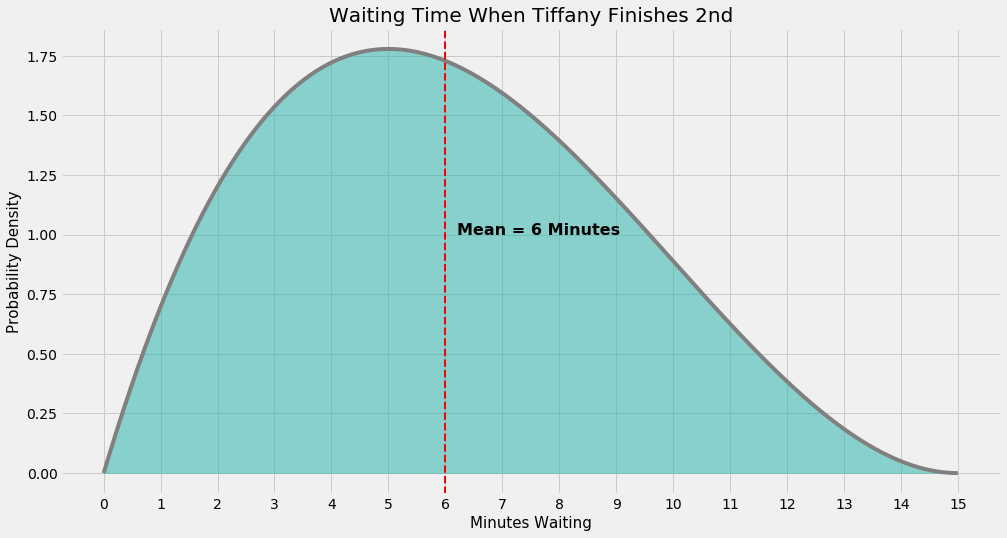

In [50]:
distribution = stats.beta(a=2, b=3)
probs = np.linspace(0, 1, 1000)
densities = distribution.pdf(probs)
fig, ax = plt.subplots(figsize=(15, 8))
plt.xticks(range(0, 16))
ax.text(x=6.2, y=1, s='Mean = 6 Minutes', alpha=1.0, color='#000000', fontsize=16, weight='bold')
ax.plot(probs*15, densities, color='grey')
ax.fill_between(probs*15, densities, color='lightseagreen', alpha=.5)
ax.axvline(x=6, color='r', linestyle='dashed', linewidth=2)
ax.set_title('Waiting Time When Tiffany Finishes 2nd', fontsize=20)
ax.set_xlabel('Minutes Waiting', fontsize=15)
ax.set_ylabel('Probability Density', fontsize=15);

#### np.arange

`np.arange` is just like the built in `range`, but it makes an array.

In [51]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [52]:
np.arange(2, 10)

array([2, 3, 4, 5, 6, 7, 8, 9])

In [53]:
np.arange(0, 10, 2)

array([0, 2, 4, 6, 8])

**Fill in the blank:** The 2 in the above code `np.arange(0, 10, 2)` is referred to as the ____ parameter. 

The differences between `np.linspace` and `np.arange` are

 * the third of `linspace` is the number of points; for `arange` it's the step size, and
 * the endpoint is included with `linspace` but not with `arange`.

#### np.random.uniform and np.random.normal

The `np.random` subpackage contains some functions for creating arrays of random numbers.  These two are the most useful, but there are more!

In [36]:
np.random.uniform(low=0.0, high=10.0, size=10).round(2)

array([7.63, 5.15, 3.55, 6.78, 7.49, 7.1 , 2.24, 6.34, 4.07, 7.31])

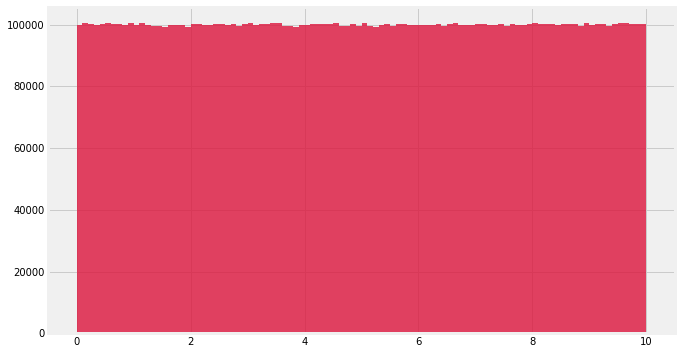

In [37]:
unif = np.random.uniform(low=0.0, high=10.0, size=10**7)

fig, ax = plt.subplots(figsize=(10, 6))
_ = ax.hist(unif, bins=100, color='crimson', alpha=0.8)

Does the above chart look like you'd expect it to?

In [38]:
np.random.normal(loc=0.0, scale=1.0, size=10)#.round(2)

array([ 0.05107687, -1.05983875,  0.95394387, -0.12285793,  0.91239169,
        1.00762202,  0.23968042, -0.41824886, -1.57588091, -0.35533863])

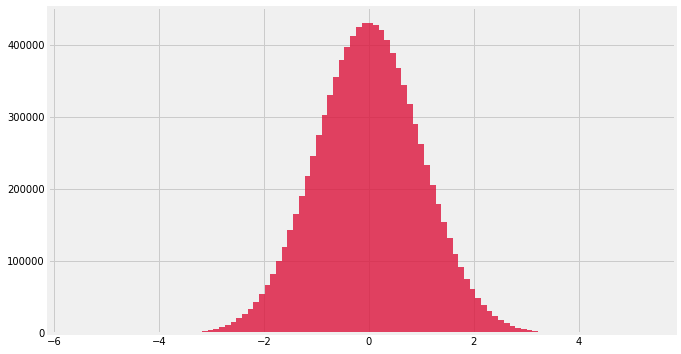

In [39]:
unif = np.random.normal(loc=0.0, scale=1.0, size=10**7)

fig, ax = plt.subplots(figsize=(10, 6))
_ = ax.hist(unif, bins=100, color='crimson', alpha=0.8)

## Broadcasting

#### Equal-shape arrays

Most of the standard binary operators in python can be used on arrays. These are interpreted as being applied **element by element**, so the result is an array of the same shape as the operands.

In [40]:
x = np.array([1, 2, 3, 4, 5, 6])
y = np.array([2, 4, 6, 8, 10, 12])

In [41]:
x + y

array([ 3,  6,  9, 12, 15, 18])

In [42]:
x - y

array([-1, -2, -3, -4, -5, -6])

In [43]:
x * y

array([ 2,  8, 18, 32, 50, 72])

In [44]:
y / x

array([2., 2., 2., 2., 2., 2.])

In [45]:
y % x

array([0, 0, 0, 0, 0, 0])

If one of the operands is a list, numpy will first convert it into an array.

In [46]:
np.array([1, 2, 3]) + [1, 2, 3]

array([2, 4, 6])

#### Broadcasting with a single value

When the arrays are of different shape, they first have to be **broadcast** into arrays of the same shape. This feature is powerful but somewhat confusing.

The simplest example of broadcasting is when one array is a single element, or just a single value. In this case the value is converted into an array of the same shape as the other, but filled with that value. In effect, that value is combined with every element of the other array.

In [47]:
2 * x

array([ 2,  4,  6,  8, 10, 12])

In [48]:
y / 2

array([1., 2., 3., 4., 5., 6.])

In [49]:
x % 2

array([1, 0, 1, 0, 1, 0])

You can also broadcast with comparison operators, this is **very useful** when combined with something we'll talk about later:

In [50]:
x <= 3

array([ True,  True,  True, False, False, False])

In [51]:
y / 2 == x

array([ True,  True,  True,  True,  True,  True])

If you need to combine boolean arrays with logical operators, broadcasting also applys to the `&` and `|` operators (and and or):

In [52]:
(x <= 2) | (x >= 5)

array([ True,  True, False, False,  True,  True])

In [53]:
(x >= 2) & (x <= 5)

array([False,  True,  True,  True,  True, False])

Note the parentheses are necessary because of python's precedence rules.

#### Broadcasting multi-dimensional arrays

Broadcasting also works for multi-dimensional arrays, but it takes some practice. As above, many copies are made of an array along one or more axes that previously had a length of one.

Let's see how this works.

In [54]:
x = np.ones((5, 4))
x

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

The scalar case is the same as it ever was:

In [55]:
2 * x

array([[2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.]])

But now things get pretty interesting.  If you broadcast with a one dimensional array, cool stuff happens:

In [56]:
b = np.array([1, 2, 3, 4])
x * b

array([[1., 2., 3., 4.],
       [1., 2., 3., 4.],
       [1., 2., 3., 4.],
       [1., 2., 3., 4.],
       [1., 2., 3., 4.]])

Note that `b` must have the correct shape for this to happen.

In [57]:
print("Shape of x:", x.shape)
print("Shape of b:   ", b.shape)

Shape of x: (5, 4)
Shape of b:    (4,)


To see if two arrays can be broadcast into the same shape, first line up the shapes of the arrays on the **right side** (as above).

Broadcasting is possible if, for every dimension, either

 * both arrays have the same length,
 * one has a length of 1, or
 * one is missing.

So to get the same behavior, but broadcasting a single column across the rows, we need to do some gymnastics.

In [58]:
b = np.array([1, 2, 3, 4, 5])
#x * b

This doesn't work because the right-hand values (4 and 5) don't line up:

In [59]:
print("Shape of x:", x.shape)
print("Shape of b:   ", b.shape)

Shape of x: (5, 4)
Shape of b:    (5,)


To get this to work, we need to reshape `b`.

In [60]:
b_reshaped = b.reshape((5, 1))
b_reshaped

array([[1],
       [2],
       [3],
       [4],
       [5]])

Now the first dimensions are the same, and the second dimension of b is 1.

In [61]:
print("Shape of x         :", x.shape)
print("Shape of b_reshaped:", b_reshaped.shape)

Shape of x         : (5, 4)
Shape of b_reshaped: (5, 1)


In case the two arrays have the same number of dimensions, as long as the dimensions **either** match, or one of them is **exactly one**, the arrays will broadcast.

In [62]:
x * b_reshaped

array([[1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.]])

The unit length dimensions are **stretched** to until the arrays have the same shape, then they are broadcast.

**Note:** We could also accomplish the first example with the same reshape principle.

In [63]:
b = np.array([1, 2, 3, 4])
b_reshaped = b.reshape((1, 4))

Note how all non-unit dimensions match:

In [55]:
type(x.shape)

tuple

In [64]:
print("Shape of x         :", x.shape)
print("Shape of b_reshaped:", b_reshaped.shape)

Shape of x         : (5, 4)
Shape of b_reshaped: (1, 4)


So we can broadcast:

In [65]:
x * b_reshaped

array([[1., 2., 3., 4.],
       [1., 2., 3., 4.],
       [1., 2., 3., 4.],
       [1., 2., 3., 4.],
       [1., 2., 3., 4.]])

## Indexing Numpy Arrays

Numpy arrays support all the usual indexing shenanigans that lists do, so we won't comment on those any more.

#### Indexing multi-dimensional arrays

The usual list style indexing extends to multi-dimensional arrays:

In [63]:
x = np.arange(20).reshape((5, 4))
x

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [64]:
# First two rows.
x[:2, :]

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [68]:
# First two columns.
x[:, [0,2]]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10],
       [12, 14],
       [16, 18]])

In [69]:
# First two rows and first two columns
x[:2, :2]

array([[0, 1],
       [4, 5]])

In [70]:
# Even numbered rows and columns
x[::2, ::2]

array([[ 0,  2],
       [ 8, 10],
       [16, 18]])

You can combine this with assignment to surgically alter arrays:

In [71]:
x[:2, :2] = np.mean(x)
x

array([[ 9,  9,  2,  3],
       [ 9,  9,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

#### Advanced Indexing

You can index an array with **another array** (or a list), and this is often referred to as **advanced indexing** or **fancy indexing**.

In [72]:
x = np.arange(0, 20, 2)
x

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [73]:
x[[0, 0, 4, 4, 2, 2]]

array([0, 0, 8, 8, 4, 4])

In [74]:
colors = np.array(['red', 'blue'])
idx = np.array([0, 0, 1, 1, 0, 0, 1, 1])
colors[idx]

array(['red', 'red', 'blue', 'blue', 'red', 'red', 'blue', 'blue'],
      dtype='<U4')

This also works for multi-dimensional arrays, but the results can be confusing.

In [75]:
x = np.arange(20).reshape((5, 4))
x

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [76]:
x[[0, 1, 2, 3], [0, 1, 2, 3]]

array([ 0,  5, 10, 15])

Again, you can use this to do surgery:

In [77]:
x[[0, 1, 2, 3], [0, 1, 2, 3]] = 999
x

array([[999,   1,   2,   3],
       [  4, 999,   6,   7],
       [  8,   9, 999,  11],
       [ 12,  13,  14, 999],
       [ 16,  17,  18,  19]])

If the arrays (or lists) used as indices don't have the same shape they will be broadcast together.

In [78]:
x[[1,2,3], [[0],[1]]]

array([[  4,   8,  12],
       [999,   9,  13]])

Array indices can be combined with slices; or detailed information read https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html. But this is really pretty advanced material.

#### Boolean Indexing

If you have an array of booleans (i.e. `True`'s and `False`'s), you can use these as indexes too.  You'll get a new array containing only those elements that line up with a `True` in your index array.

In [79]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [80]:
x[[True, True, False, False, True, True, False, False, True, True]]

array([0, 1, 4, 5, 8, 9])

This is **very** useful when combined with broadcasting to create boolean index arrays.

In [81]:
x % 2 == 0

array([ True, False,  True, False,  True, False,  True, False,  True,
       False])

In [82]:
# Subset to the even entries.
x[x % 2 == 0]

array([0, 2, 4, 6, 8])

Note that it's easy to do the wrong thing here!

In [83]:
# ???
x[x % 2]

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1])

Both of these are useful, depending on your intention.

You can also use this technique to select specific rows or columns in a multi-dimensional array:

In [84]:
x = np.arange(20).reshape((5, 4))
x

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [85]:
x[[True, False, True, True, False], :]

array([[ 0,  1,  2,  3],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [86]:
x[:, [False, True, False, True]]

array([[ 1,  3],
       [ 5,  7],
       [ 9, 11],
       [13, 15],
       [17, 19]])

And, of course, this allows for some surgical operations:

In [87]:
x[[True, False, True, True, False], :] = 999
x

array([[999, 999, 999, 999],
       [  4,   5,   6,   7],
       [999, 999, 999, 999],
       [999, 999, 999, 999],
       [ 16,  17,  18,  19]])

When combined with broadcasting, this can get you to some neat places.

In [88]:
x = np.random.randint(0, 10, size=(6, 10))
x

array([[4, 7, 4, 5, 3, 8, 2, 0, 4, 6],
       [9, 7, 0, 9, 1, 9, 0, 1, 5, 3],
       [5, 7, 4, 2, 7, 1, 6, 6, 3, 6],
       [4, 6, 1, 5, 9, 3, 3, 6, 6, 6],
       [8, 1, 2, 5, 9, 4, 1, 9, 7, 4],
       [9, 3, 0, 7, 0, 8, 8, 1, 7, 9]])

Only the columns where the value in the first fow is bigger than five.

In [89]:
x[:, x[0, :] > 5]

array([[7, 8, 6],
       [7, 9, 3],
       [7, 1, 6],
       [6, 3, 6],
       [1, 4, 4],
       [3, 8, 9]])

Only the rows where the value in the first column is bigger than five.

In [90]:
x[x[:, 0] > 5, :]

array([[9, 7, 0, 9, 1, 9, 0, 1, 5, 3],
       [8, 1, 2, 5, 9, 4, 1, 9, 7, 4],
       [9, 3, 0, 7, 0, 8, 8, 1, 7, 9]])

## Array Methods and Axes
Array's have many, many useful methods, and some of then have an argument called `axis` that increases their utility.
#### Math stuff
Most of the day-to-day mathematical functions have representatives in numpy.

In [91]:
x = np.linspace(0, 1, 11)
x

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [92]:
np.exp(x)

array([1.        , 1.10517092, 1.22140276, 1.34985881, 1.4918247 ,
       1.64872127, 1.8221188 , 2.01375271, 2.22554093, 2.45960311,
       2.71828183])

In [93]:
np.log(x)

/Users/booleans/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


array([       -inf, -2.30258509, -1.60943791, -1.2039728 , -0.91629073,
       -0.69314718, -0.51082562, -0.35667494, -0.22314355, -0.10536052,
        0.        ])

In [94]:
np.sin(2 * np.pi * x)

array([ 0.00000000e+00,  5.87785252e-01,  9.51056516e-01,  9.51056516e-01,
        5.87785252e-01,  1.22464680e-16, -5.87785252e-01, -9.51056516e-01,
       -9.51056516e-01, -5.87785252e-01, -2.44929360e-16])

In [95]:
np.cos(2 * np.pi * x)

array([ 1.        ,  0.80901699,  0.30901699, -0.30901699, -0.80901699,
       -1.        , -0.80901699, -0.30901699,  0.30901699,  0.80901699,
        1.        ])

In [96]:
np.sqrt(x)

array([0.        , 0.31622777, 0.4472136 , 0.54772256, 0.63245553,
       0.70710678, 0.77459667, 0.83666003, 0.89442719, 0.9486833 ,
       1.        ])

#### Sums and averages

It's easy and efficient to take the sum or average (arithmetic mean) of an array:

In [97]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [98]:
np.sum(x)

45

In [99]:
np.mean(x)

4.5

When dealing with a multi-dimensional array, the default behaviour is to consume the entire thing:

In [100]:
x = np.arange(20).reshape((4, 5))
x

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [101]:
np.sum(x)

190

But you can also do **row sums** and **column sums** by supplying an axis argument.

In [102]:
np.sum(x, axis=0)

array([30, 34, 38, 42, 46])

In [103]:
np.sum(x, axis=1)

array([10, 35, 60, 85])

It's easy to lose track if the axes. Sometimes the `keepdims` parameter will make it more clear.

In [104]:
np.sum(x, axis=0, keepdims=True)

array([[30, 34, 38, 42, 46]])

In [105]:
np.sum(x, axis=1, keepdims=True)

array([[10],
       [35],
       [60],
       [85]])

#### Maxmiums and minimums

Maximums and minimums work pretty much the same way as sums and averages.

In [106]:
x = np.random.randint(0, 100, size=10)
x

array([37, 15, 31, 13, 10,  8, 63, 99, 28, 83])

In [107]:
np.max(x)

99

In [108]:
np.min(x)

8

The behavior for multi-dimensional arrays is the same as before:

In [109]:
x = np.random.randint(0, 100, size=20).reshape((4, 5))
x

array([[74,  0,  1, 58, 89],
       [18,  9,  0, 33, 78],
       [15, 15, 53, 12, 78],
       [93, 62, 22, 85, 44]])

In [110]:
# Column maximums
np.max(x, axis=0)

array([93, 62, 53, 85, 89])

In [111]:
# Row minimums
np.max(x, axis=1)

array([89, 78, 78, 93])

#### Argument Maximums and Minimums

Sometimes you don't need to know the maximum (or minimum), but **where the maximum occurs**.  This operation is called **argument maximum**.

In [112]:
x

array([[74,  0,  1, 58, 89],
       [18,  9,  0, 33, 78],
       [15, 15, 53, 12, 78],
       [93, 62, 22, 85, 44]])

In [113]:
np.argmax(x, axis=0)

array([3, 3, 2, 3, 0])

In [114]:
np.argmin(x, axis=1)

array([1, 2, 3, 2])

This can be very useful.  For example, if we want to find the maximum of a graph and then plot where it occurs:

(-100, 100)

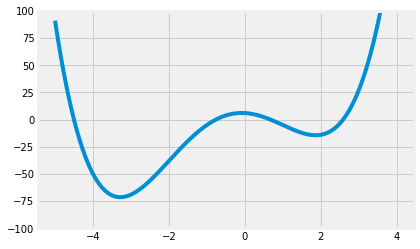

In [115]:
f = lambda x: x**4 + 2*x**3 - 12*x**2 - 2*x + 6
x = np.linspace(-5, 4, num=250)

fig, ax = plt.subplots()
ax.plot(x, f(x))
ax.set_ylim(-100, 100)

Now lets calculate the minimum and argmin and highlight it:

(-100, 100)

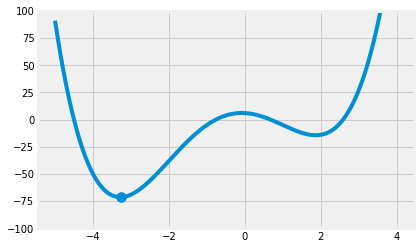

In [116]:
xmn, mn = x[np.argmin(f(x))], np.min(f(x))

fig, ax = plt.subplots()
ax.plot(x, f(x))
ax.scatter(xmn, mn, s=100)
ax.set_ylim(-100, 100)